In [7]:
import pandas as pd
import os
import numpy as np
import networkx as nx

### Using networkx

['123', '456', '']
123 456 
['1', '1', '']
1 1 
['2', '2', '']
2 2 


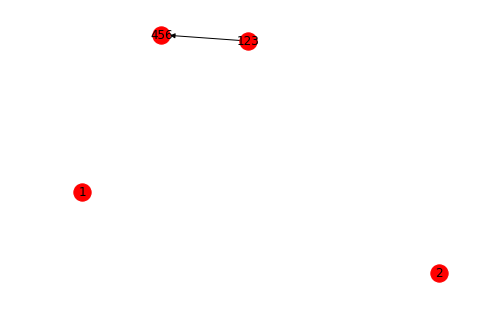

In [9]:
DG = nx.DiGraph()
b = ['123 456 ', '1 1 ', '2 2 ']
for i in b:
    from_to = i.split(' ')
    print(from_to)
    print(i)
    fromint = int(from_to[0])
    toint = int(from_to[1])
    DG.add_edge(fromint, toint)

nx.draw(DG, with_labels = True)

### Using pandas

In [35]:
os.remove('graph.csv')
b = ['123 456 ', '1 1 ', '2 2 ']
header_setter = 0
with open('graph.csv', 'a') as graph_file:
    for i in b:
        from_to = i.split(' ')
        fromint = int(from_to[0])
        toint = int(from_to[1])
        d = {'from': [fromint], 'to': [toint]}
        df = pd.DataFrame(data=d)
        if header_setter == 0:
            df.to_csv(graph_file, header=True, index=False)
            header_setter = 1
        elif header_setter == 1:
            df.to_csv(graph_file, header=False, index=False)

graph_stored = pd.read_csv("graph.csv")
print(graph_stored)

   from   to
0   123  456
1     1    1
2     2    2


In [37]:
graph_stored['from']

0    123
1      1
2      2
Name: from, dtype: int64

In [38]:
graph_stored['to']

0    456
1      1
2      2
Name: to, dtype: int64

To select rows whose column value equals a scalar, 123 , use ==:

In [47]:
df = graph_stored
df.loc[df['from'] == 123]

,from,to
0,123,456


To select rows whose column value is in an iterable, [123, 2] , use isin:

In [50]:
df.loc[df['from'].isin([123, 2])]

,from,to
0,123,456
2,2,2


Combine multiple conditions with & :

In [53]:
df.loc[(df['from'] >= 100) & (df['to'] <= 500)]

,from,to
0,123,456


Note the parentheses. Due to Python's operator precedence rules, & binds more tightly than <= and >=. Thus, the parentheses in the last example are necessary. Without the parentheses

In [57]:
df.loc[df['from'] >= 100 & df['to'] <= 500]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

is parsed as
<br><br>
    df['column_name'] >= (A & df['column_name']) <= B
<br><br>
which results in a Truth value of a Series is ambiguous error.

***

To select rows whose column value does not equal 123, use !=:

In [58]:
df.loc[df['from'] != 123]

,from,to
1,1,1
2,2,2


**isin** returns a boolean Series, so to select rows whose value is not in some_values, negate the boolean Series using ~:

In [59]:
df.loc[~df['from'].isin([123, 2])]

,from,to
1,1,1


Check whether a pandas DataFrame is empty :

In [65]:
graph_stored.loc[graph_stored['from'] == 3]

,from,to


In [69]:
x = 0
if graph_stored.loc[graph_stored['from'] == 3].empty:
    x = 1
print(x)

1


**Solve : EmptyDataError: No columns to parse from file**<br>
**Should I use `with open(file):` if I want to `pd.read_csv`? **
<br>
With open('<>') as file: method allows the users need to do line by line operations for single or multiple lines in the file.

pandas handles the files differently. When you import a file to pandas dataframe, it imports the entire contents of the file to the dataframe. Opening and closing the file are not needed to be specified since you will be processing the dataframe there on.

Hence, when you are reading files to a pandas dataframe, with open () is not required.

In [89]:
with open('edge.csv', 'a') as edge_file, open('nodes.csv', 'a') as nodes_file: 
    if os.path.getsize("nodes.csv") <= 0:
        d2 = {'explored': [0], 'scc': [1], 'starting time': [3]}
        df2 = pd.DataFrame(data=d2)
        df2.to_csv(nodes_file, header=True, index=False)
        
with open('edge.csv', 'a') as edge_file, open('nodes.csv', 'a') as nodes_file: 
    empty_graph = pd.read_csv("nodes.csv") 
    if empty_graph.loc[empty_graph['explored'] == 3].empty:
        d2 = {'explored': [3], 'scc': [1], 'starting time': [5]}
        df2 = pd.DataFrame(data=d2)
        df2.to_csv(nodes_file, header=False, index=False)
    for i in range(20):
        d2 = {'explored': [i], 'scc': [i], 'starting time': [i]}
        df2 = pd.DataFrame(data=d2)
        df2.to_csv(nodes_file, header=False, index=False)
        
graph_stored = pd.read_csv("nodes.csv")
print(graph_stored)

    explored  scc  starting time
0          0    1              3
1          3    1              5
2          0    0              0
3          1    1              1
4          2    2              2
5          3    3              3
6          4    4              4
7          5    5              5
8          6    6              6
9          7    7              7
10         8    8              8
11         9    9              9
12        10   10             10
13        11   11             11
14        12   12             12
15        13   13             13
16        14   14             14
17        15   15             15
18        16   16             16
19        17   17             17
20        18   18             18
21        19   19             19


In [95]:
i=0
for chunk in pd.read_csv("nodes.csv", chunksize=5):
    print(chunk)
    print(chunk["explored"])
    print(chunk["explored"][i])
    i = i+5

   explored  scc  starting time
0         0    1              3
1         3    1              5
2         0    0              0
3         1    1              1
4         2    2              2
0    0
1    3
2    0
3    1
4    2
Name: explored, dtype: int64
0
   explored  scc  starting time
5         3    3              3
6         4    4              4
7         5    5              5
8         6    6              6
9         7    7              7
5    3
6    4
7    5
8    6
9    7
Name: explored, dtype: int64
3
    explored  scc  starting time
10         8    8              8
11         9    9              9
12        10   10             10
13        11   11             11
14        12   12             12
10     8
11     9
12    10
13    11
14    12
Name: explored, dtype: int64
8
    explored  scc  starting time
15        13   13             13
16        14   14             14
17        15   15             15
18        16   16             16
19        17   17             17
15    13
16 